## Take Home

Some interesting things we could look at regarding NFL player grades and statistics:

-- Change in average grades of top players in a position:
- Graph the change over time of the top 20 quarterbacks with a certain amount of snaps each year.
- Do the same with running backs and wide receivers. Can we use this to argue that the NFL is becoming more of a passing league?

-- Who is the best at coverage between defensive position groups? Which position group is the best at stopping the run? Stopping the pass?

-- Do some sort of visualization with the combined dataset with receivers that have college and nfl stats. Putting them on a scatterplot would be very cool. I'm thinking do highest grade in the league with highest amount of yards. We can also do receptions and touchdowns too.

It would also be cool to look at how certain draft classes are doing but that would require more data scraping.

In [234]:
import pandas as pd
full_receiving = pd.read_csv("data/full_recieving.csv")

# remove team name, create column for highest grade (200 snap min), remove all players that don't have college stats
full_receiving = full_receiving[full_receiving["grad_year"].notna()]

# find best grade, year with best grade
full_receiving["best_grade"] = full_receiving[["grades_pass_route_2021", "grades_pass_route_2020", "grades_pass_route_2019", "grades_pass_route_2018", "grades_pass_route_2017", "grades_pass_route_2016", "grades_pass_route_2015", "grades_pass_route_2014"]].max(axis=1)
full_receiving["best_year"] = full_receiving[["grades_pass_route_2021", "grades_pass_route_2020", "grades_pass_route_2019", "grades_pass_route_2018", "grades_pass_route_2017", "grades_pass_route_2016", "grades_pass_route_2015", "grades_pass_route_2014"]].idxmax(axis=1)

# sed
full_receiving["best_year"] = full_receiving["best_year"].replace(to_replace = r'grades_pass_route_([0-9]{4})', value = r'pass_plays_\1', regex = True)
full_receiving = full_receiving[full_receiving["best_grade"].notna()]

# find number of snaps for best year
full_receiving["snaps"] = [row[row["best_year"]] for _, row in full_receiving.iterrows()]

# filter out where best year doesn't have 200 snaps 
full_receiving["min_snaps"] = 200
full_receiving = full_receiving.query("snaps > min_snaps")
full_receiving = full_receiving[(full_receiving.grad_year != 2018)]

# drop all other rows
full_receiving = full_receiving[["player", "player_id", "position", "best_grade", "snaps", "rec", "yds", "td"]]
full_receiving


,player,player_id,position,best_grade,snaps,rec,yds,td
1,Tyreek Hill,10799,WR,89.8,703.0,31.0,281.0,1.0
4,Stefon Diggs,9579,WR,90.6,794.0,62.0,792.0,5.0
8,D.J. Moore,48267,WR,80.2,607.0,80.0,1033.0,8.0
10,Mark Andrews,47436,TE,91.0,670.0,62.0,958.0,8.0
23,Chris Godwin,11839,WR,90.4,634.0,69.0,1101.0,11.0
...,...,...,...,...,...,...,...,...
838,Braxton Miller,10719,WR,54.9,268.0,25.0,340.0,3.0
859,Thomas Rawls,9993,HB,55.8,211.0,10.0,93.0,0.0
933,Malcolm Mitchell,10746,WR,64.5,408.0,58.0,865.0,5.0
964,Keith Mumphery,9608,WR,47.6,230.0,26.0,495.0,3.0


In [235]:
import seaborn as sns
import matplotlib.pyplot as plt

In [236]:
import altair as alt
from vega_datasets import data
from altair import datum

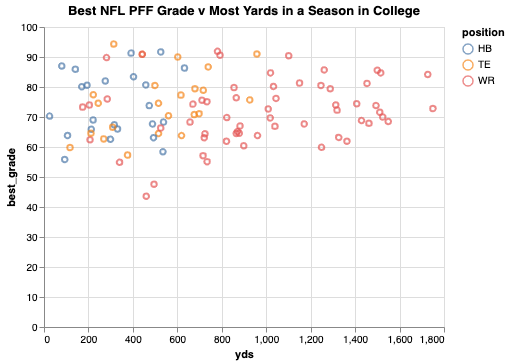

In [237]:
chart = alt.Chart(full_receiving).mark_point().encode(
    x="yds:Q",
    y="best_grade:Q",
    color="position:N",
    tooltip='player:N',
).transform_filter(
    (datum.position == "WR") | (datum.position == "HB") | (datum.position == "TE")
).properties(
    title={
        "text": "Best NFL PFF Grade v Most Yards in a Season in College"
    }
)

chart

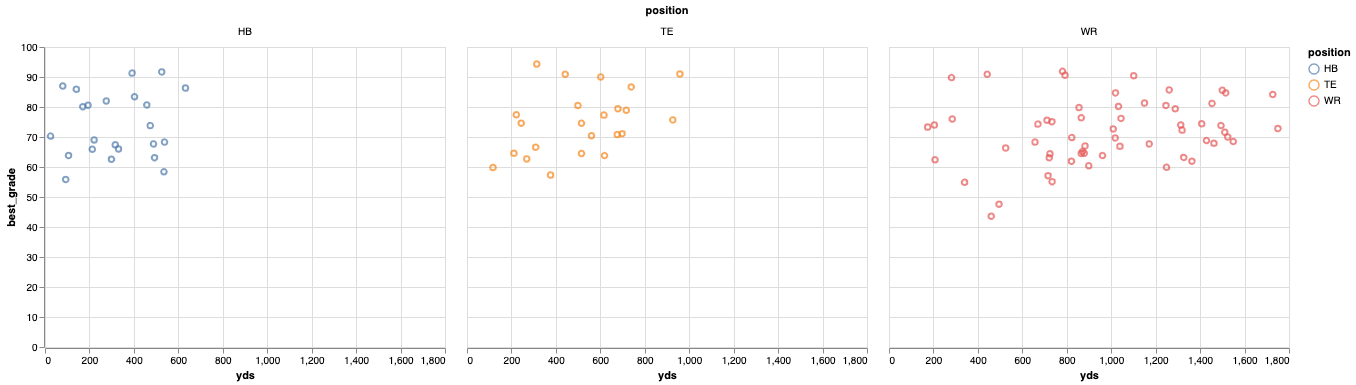

In [238]:
multi_chart = chart.facet("position")
multi_chart

In [353]:
# import numpy as np

# qbs = pd.read_csv("data/quarterbacks.csv")
# rbs = pd.read_csv("data/rushing.csv")
# wrs = pd.read_csv("data/recieving.csv")

# qbs = qbs.fillna(10000)
# rbs = rbs.fillna(10000)
# wrs = wrs.fillna(10000)
# # qbs = qbs.query("passing_snaps_2017 > min_snaps")
# # qbs = qbs.replace(10000, np.nan)
# # qbs.groupby(["grades_pass_2021", "grades_pass_2020", "grades_pass_2019", "grades_pass_2018", "grades_pass_2017", "grades_pass_2016", "grades_pass_2015", "grades_pass_2014", "grades_pass_2013", "grades_pass_2012"].nlargest(20)

# qbs['s2021'] = tuple(zip(qbs.grades_offense_2021, qbs.grades_pass_2021, qbs.passing_snaps_2021))
# qbs['s2020'] = tuple(zip(qbs.grades_offense_2020, qbs.grades_pass_2020, qbs.passing_snaps_2020))
# qbs['s2019'] = tuple(zip(qbs.grades_offense_2019, qbs.grades_pass_2019, qbs.passing_snaps_2019))
# qbs['s2018'] = tuple(zip(qbs.grades_offense_2018, qbs.grades_pass_2018, qbs.passing_snaps_2018))
# qbs['s2017'] = tuple(zip(qbs.grades_offense_2017, qbs.grades_pass_2017, qbs.passing_snaps_2017))
# qbs['s2016'] = tuple(zip(qbs.grades_offense_2016, qbs.grades_pass_2016, qbs.passing_snaps_2016))
# qbs['s2015'] = tuple(zip(qbs.grades_offense_2015, qbs.grades_pass_2015, qbs.passing_snaps_2015))
# qbs['s2014'] = tuple(zip(qbs.grades_offense_2014, qbs.grades_pass_2014, qbs.passing_snaps_2014))
# qbs['s2013'] = tuple(zip(qbs.grades_offense_2013, qbs.grades_pass_2013, qbs.passing_snaps_2013))
# qbs['s2012'] = tuple(zip(qbs.grades_offense_2012, qbs.grades_pass_2012, qbs.passing_snaps_2012))

# rbs['s2021'] = tuple(zip(rbs.grades_offense_2021, rbs.grades_run_2021, rbs.attempts_2021))
# rbs['s2020'] = tuple(zip(rbs.grades_offense_2020, rbs.grades_run_2020, rbs.attempts_2020))
# rbs['s2019'] = tuple(zip(rbs.grades_offense_2019, rbs.grades_run_2019, rbs.attempts_2019))
# rbs['s2018'] = tuple(zip(rbs.grades_offense_2018, rbs.grades_run_2018, rbs.attempts_2018))
# rbs['s2017'] = tuple(zip(rbs.grades_offense_2017, rbs.grades_run_2017, rbs.attempts_2017))
# rbs['s2016'] = tuple(zip(rbs.grades_offense_2016, rbs.grades_run_2016, rbs.attempts_2016))
# rbs['s2015'] = tuple(zip(rbs.grades_offense_2015, rbs.grades_run_2015, rbs.attempts_2015))
# rbs['s2014'] = tuple(zip(rbs.grades_offense_2014, rbs.grades_run_2014, rbs.attempts_2014))
# rbs['s2013'] = tuple(zip(rbs.grades_offense_2013, rbs.grades_run_2013, rbs.attempts_2013))
# rbs['s2012'] = tuple(zip(rbs.grades_offense_2012, rbs.grades_run_2012, rbs.attempts_2012))

# wrs['s2021'] = tuple(zip(wrs.grades_offense_2021, wrs.grades_pass_route_2021, wrs.pass_plays_2021))
# wrs['s2020'] = tuple(zip(wrs.grades_offense_2020, wrs.grades_pass_route_2020, wrs.pass_plays_2020))
# wrs['s2019'] = tuple(zip(wrs.grades_offense_2019, wrs.grades_pass_route_2019, wrs.pass_plays_2019))
# wrs['s2018'] = tuple(zip(wrs.grades_offense_2018, wrs.grades_pass_route_2018, wrs.pass_plays_2018))
# wrs['s2017'] = tuple(zip(wrs.grades_offense_2017, wrs.grades_pass_route_2017, wrs.pass_plays_2017))
# wrs['s2016'] = tuple(zip(wrs.grades_offense_2016, wrs.grades_pass_route_2016, wrs.pass_plays_2016))
# wrs['s2015'] = tuple(zip(wrs.grades_offense_2015, wrs.grades_pass_route_2015, wrs.pass_plays_2015))
# wrs['s2014'] = tuple(zip(wrs.grades_offense_2014, wrs.grades_pass_route_2014, wrs.pass_plays_2014))
# wrs['s2013'] = tuple(zip(wrs.grades_offense_2013, wrs.grades_pass_route_2013, wrs.pass_plays_2013))
# wrs['s2012'] = tuple(zip(wrs.grades_offense_2012, wrs.grades_pass_route_2012, wrs.pass_plays_2012))

# qbs = qbs[["player", "s2021", "s2020", "s2019", "s2018","s2017","s2016","s2015","s2014","s2013","s2012" ]]
# rbs = rbs[["player", "s2021", "s2020", "s2019", "s2018","s2017","s2016","s2015","s2014","s2013","s2012" ]]
# wrs = wrs[["player", "s2021", "s2020", "s2019", "s2018","s2017","s2016","s2015","s2014","s2013","s2012" ]]

# # list = [qbs['s2021'], qbs['s2020'], qbs['s2019'], qbs['s2018'], qbs['s2017'], qbs['s2016'], qbs['s2015'], qbs['s2014'], qbs['s2013'], qbs['s2012']]

# # print(qbs)

# # names = [i for i in qbs['player']]
# f2021 = []
# f2020 = []
# f2019 = []
# f2018 = []
# f2017 = []
# f2016 = []
# f2015 = []
# f2014 = []
# f2013 = []
# f2012 = []

# r2021 = []
# r2020 = []
# r2019 = []
# r2018 = []
# r2017 = []
# r2016 = []
# r2015 = []
# r2014 = []
# r2013 = []
# r2012 = []

# w2021 = []
# w2020 = []
# w2019 = []
# w2018 = []
# w2017 = []
# w2016 = []
# w2015 = []
# w2014 = []
# w2013 = []
# w2012 = []

# for i in qbs['s2021']:
#     if i[2] < 400 or i[2] == 10000:
#         continue
#     f2021.append(i)
    
# for i in qbs['s2020']:
#     if i[2] < 400 or i[2] == 10000:
#         continue
#     f2020.append(i)
    
# for i in qbs['s2019']:
#     if i[2] < 400 or i[2] == 10000:
#         continue
#     f2019.append(i)
    
# for i in qbs['s2018']:
#     if i[2] < 400 or i[2] == 10000:
#         continue
#     f2018.append(i)
    
# for i in qbs['s2017']:
#     if i[2] < 400 or i[2] == 10000:
#         continue
#     f2017.append(i)
    
# for i in qbs['s2016']:
#     if i[2] < 400 or i[2] == 10000:
#         continue
#     f2016.append(i)
    
# for i in qbs['s2015']:
#     if i[2] < 400 or i[2] == 10000:
#         continue
#     f2015.append(i)
    
# for i in qbs['s2014']:
#     if i[2] < 400 or i[2] == 10000:
#         continue
#     f2014.append(i)
    
# for i in qbs['s2013']:
#     if i[2] < 400 or i[2] == 10000:
#         continue
#     f2013.append(i)
    
# for i in qbs['s2012']:
#     if i[2] < 400 or i[2] == 10000:
#         continue
#     f2012.append(i)
    
#     ##
    
# for i in rbs['s2021']:
#     if i[2] < 150 or i[2] == 10000:
#         continue
#     r2021.append(i)
    
# for i in rbs['s2020']:
#     if i[2] < 150 or i[2] == 10000:
#         continue
#     r2020.append(i)
    
# for i in rbs['s2019']:
#     if i[2] < 150 or i[2] == 10000:
#         continue
#     r2019.append(i)
    
# for i in rbs['s2018']:
#     if i[2] < 150 or i[2] == 10000:
#         continue
#     r2018.append(i)
    
# for i in rbs['s2017']:
#     if i[2] < 150 or i[2] == 10000:
#         continue
#     r2017.append(i)
    
# for i in rbs['s2016']:
#     if i[2] < 150 or i[2] == 10000:
#         continue
#     r2016.append(i)
    
# for i in rbs['s2015']:
#     if i[2] < 150 or i[2] == 10000:
#         continue
#     r2015.append(i)
    
# for i in rbs['s2014']:
#     if i[2] < 150 or i[2] == 10000:
#         continue
#     r2014.append(i)
    
# for i in rbs['s2013']:
#     if i[2] < 150 or i[2] == 10000:
#         continue
#     r2013.append(i)
    
# for i in rbs['s2012']:
#     if i[2] < 150 or i[2] == 10000:
#         continue
#     r2012.append(i)
    
#     ##
    
# for i in wrs['s2021']:
#     if i[2] < 300 or i[2] == 10000:
#         continue
#     w2021.append(i)
    
# for i in wrs['s2020']:
#     if i[2] < 300 or i[2] == 10000:
#         continue
#     w2020.append(i)
    
# for i in wrs['s2019']:
#     if i[2] < 300 or i[2] == 10000:
#         continue
#     w2019.append(i)
    
# for i in wrs['s2018']:
#     if i[2] < 300 or i[2] == 10000:
#         continue
#     w2018.append(i)
    
# for i in wrs['s2017']:
#     if i[2] < 300 or i[2] == 10000:
#         continue
#     w2017.append(i)
    
# for i in wrs['s2016']:
#     if i[2] < 300 or i[2] == 10000:
#         continue
#     w2016.append(i)
    
# for i in wrs['s2015']:
#     if i[2] < 300 or i[2] == 10000:
#         continue
#     w2015.append(i)
    
# for i in wrs['s2014']:
#     if i[2] < 300 or i[2] == 10000:
#         continue
#     w2014.append(i)
    
# for i in wrs['s2013']:
#     if i[2] < 300 or i[2] == 10000:
#         continue
#     w2013.append(i)
    
# for i in wrs['s2012']:
#     if i[2] < 300 or i[2] == 10000:
#         continue
#     w2012.append(i)
    
# data = [f2012, f2013, f2014, f2015, f2016, f2017, f2018, f2019, f2020, f2021]
# rdata = [r2012, r2013, r2014, r2015, r2016, r2017, r2018, r2019, r2020, r2021]
# wdata = [w2012, w2013, w2014, w2015, w2016, w2017, w2018, w2019, w2020, w2021]

# years = [2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021]
# # position = ["QB", "RB", "WR", "QB", "RB", "WR", "QB", "RB", "WR", "QB", "RB", "WR", "QB", "RB", "WR", "QB", "RB", "WR", "QB", "RB", "WR", "QB", "RB", "WR", "QB", "RB", "WR", "QB", "RB", "WR"]
# # qb_average = []
# average = []
# for i in data:
#     # print(i)
#     running = 0
#     count = 0
#     for j in i:
#         running += j[0]
#         count += 1
#     average.append(running/count)
    
# rb_average = []
# for i in rdata:
#     # print(i)
#     running = 0
#     count = 0
#     for j in i:
#         running += j[0]
#         count += 1
#     rb_average.append(running/count)
    
# wr_average = []
# for i in wdata:
#     # print(i)
#     running = 0
#     count = 0
#     for j in i:
#         running += j[0]
#         count += 1
#     wr_average.append(running/count)

# # print(years)
# # print(qb_average)
# # print(rb_average)
# # print(wr_average)
    
# # average

# # print(len(average))
# # print(len(years))
# # print(len(position))

# df = pd.DataFrame({'Year':years, 'qb':average, 'rb':rb_average, 'wr':wr_average})
# df


,Year,qb,rb,wr
0,2012,72.037037,73.565517,72.919048
1,2013,74.088462,73.534286,71.727273
2,2014,71.834615,68.645455,70.713333
3,2015,73.570370,65.628125,70.759740
4,2016,74.100000,66.867857,70.505806
5,2017,73.835714,68.623529,68.850000
6,2018,77.362069,73.516667,70.389726
7,2019,75.214286,72.451515,69.569872
8,2020,79.750000,74.017241,70.912102
9,2021,74.576667,73.162500,69.293671


In [374]:
import numpy as np

qbs = pd.read_csv("data/quarterbacks.csv")
rbs = pd.read_csv("data/rushing.csv")
wrs = pd.read_csv("data/recieving.csv")

qbs = qbs.fillna(10000)
rbs = rbs.fillna(10000)
wrs = wrs.fillna(10000)
# qbs = qbs.query("passing_snaps_2017 > min_snaps")
# qbs = qbs.replace(10000, np.nan)
# qbs.groupby(["grades_pass_2021", "grades_pass_2020", "grades_pass_2019", "grades_pass_2018", "grades_pass_2017", "grades_pass_2016", "grades_pass_2015", "grades_pass_2014", "grades_pass_2013", "grades_pass_2012"].nlargest(20)

qbs['s2021'] = tuple(zip(qbs.grades_offense_2021, qbs.grades_pass_2021, qbs.passing_snaps_2021))
qbs['s2020'] = tuple(zip(qbs.grades_offense_2020, qbs.grades_pass_2020, qbs.passing_snaps_2020))
qbs['s2019'] = tuple(zip(qbs.grades_offense_2019, qbs.grades_pass_2019, qbs.passing_snaps_2019))
qbs['s2018'] = tuple(zip(qbs.grades_offense_2018, qbs.grades_pass_2018, qbs.passing_snaps_2018))
qbs['s2017'] = tuple(zip(qbs.grades_offense_2017, qbs.grades_pass_2017, qbs.passing_snaps_2017))
qbs['s2016'] = tuple(zip(qbs.grades_offense_2016, qbs.grades_pass_2016, qbs.passing_snaps_2016))
qbs['s2015'] = tuple(zip(qbs.grades_offense_2015, qbs.grades_pass_2015, qbs.passing_snaps_2015))
qbs['s2014'] = tuple(zip(qbs.grades_offense_2014, qbs.grades_pass_2014, qbs.passing_snaps_2014))
qbs['s2013'] = tuple(zip(qbs.grades_offense_2013, qbs.grades_pass_2013, qbs.passing_snaps_2013))
qbs['s2012'] = tuple(zip(qbs.grades_offense_2012, qbs.grades_pass_2012, qbs.passing_snaps_2012))

rbs['s2021'] = tuple(zip(rbs.grades_offense_2021, rbs.grades_run_2021, rbs.attempts_2021))
rbs['s2020'] = tuple(zip(rbs.grades_offense_2020, rbs.grades_run_2020, rbs.attempts_2020))
rbs['s2019'] = tuple(zip(rbs.grades_offense_2019, rbs.grades_run_2019, rbs.attempts_2019))
rbs['s2018'] = tuple(zip(rbs.grades_offense_2018, rbs.grades_run_2018, rbs.attempts_2018))
rbs['s2017'] = tuple(zip(rbs.grades_offense_2017, rbs.grades_run_2017, rbs.attempts_2017))
rbs['s2016'] = tuple(zip(rbs.grades_offense_2016, rbs.grades_run_2016, rbs.attempts_2016))
rbs['s2015'] = tuple(zip(rbs.grades_offense_2015, rbs.grades_run_2015, rbs.attempts_2015))
rbs['s2014'] = tuple(zip(rbs.grades_offense_2014, rbs.grades_run_2014, rbs.attempts_2014))
rbs['s2013'] = tuple(zip(rbs.grades_offense_2013, rbs.grades_run_2013, rbs.attempts_2013))
rbs['s2012'] = tuple(zip(rbs.grades_offense_2012, rbs.grades_run_2012, rbs.attempts_2012))

wrs['s2021'] = tuple(zip(wrs.grades_offense_2021, wrs.grades_pass_route_2021, wrs.pass_plays_2021))
wrs['s2020'] = tuple(zip(wrs.grades_offense_2020, wrs.grades_pass_route_2020, wrs.pass_plays_2020))
wrs['s2019'] = tuple(zip(wrs.grades_offense_2019, wrs.grades_pass_route_2019, wrs.pass_plays_2019))
wrs['s2018'] = tuple(zip(wrs.grades_offense_2018, wrs.grades_pass_route_2018, wrs.pass_plays_2018))
wrs['s2017'] = tuple(zip(wrs.grades_offense_2017, wrs.grades_pass_route_2017, wrs.pass_plays_2017))
wrs['s2016'] = tuple(zip(wrs.grades_offense_2016, wrs.grades_pass_route_2016, wrs.pass_plays_2016))
wrs['s2015'] = tuple(zip(wrs.grades_offense_2015, wrs.grades_pass_route_2015, wrs.pass_plays_2015))
wrs['s2014'] = tuple(zip(wrs.grades_offense_2014, wrs.grades_pass_route_2014, wrs.pass_plays_2014))
wrs['s2013'] = tuple(zip(wrs.grades_offense_2013, wrs.grades_pass_route_2013, wrs.pass_plays_2013))
wrs['s2012'] = tuple(zip(wrs.grades_offense_2012, wrs.grades_pass_route_2012, wrs.pass_plays_2012))

qbs = qbs[["player", "s2021", "s2020", "s2019", "s2018","s2017","s2016","s2015","s2014","s2013","s2012" ]]
rbs = rbs[["player", "s2021", "s2020", "s2019", "s2018","s2017","s2016","s2015","s2014","s2013","s2012" ]]
wrs = wrs[["player", "s2021", "s2020", "s2019", "s2018","s2017","s2016","s2015","s2014","s2013","s2012" ]]

# list = [qbs['s2021'], qbs['s2020'], qbs['s2019'], qbs['s2018'], qbs['s2017'], qbs['s2016'], qbs['s2015'], qbs['s2014'], qbs['s2013'], qbs['s2012']]

# print(qbs)

# names = [i for i in qbs['player']]
f2021 = []
f2020 = []
f2019 = []
f2018 = []
f2017 = []
f2016 = []
f2015 = []
f2014 = []
f2013 = []
f2012 = []

r2021 = []
r2020 = []
r2019 = []
r2018 = []
r2017 = []
r2016 = []
r2015 = []
r2014 = []
r2013 = []
r2012 = []

w2021 = []
w2020 = []
w2019 = []
w2018 = []
w2017 = []
w2016 = []
w2015 = []
w2014 = []
w2013 = []
w2012 = []

for i in qbs['s2021']:
    if i[2] < 400 or i[2] == 10000:
        continue
    f2021.append(i)
    
for i in qbs['s2020']:
    if i[2] < 400 or i[2] == 10000:
        continue
    f2020.append(i)
    
for i in qbs['s2019']:
    if i[2] < 400 or i[2] == 10000:
        continue
    f2019.append(i)
    
for i in qbs['s2018']:
    if i[2] < 400 or i[2] == 10000:
        continue
    f2018.append(i)
    
for i in qbs['s2017']:
    if i[2] < 400 or i[2] == 10000:
        continue
    f2017.append(i)
    
for i in qbs['s2016']:
    if i[2] < 400 or i[2] == 10000:
        continue
    f2016.append(i)
    
for i in qbs['s2015']:
    if i[2] < 400 or i[2] == 10000:
        continue
    f2015.append(i)
    
for i in qbs['s2014']:
    if i[2] < 400 or i[2] == 10000:
        continue
    f2014.append(i)
    
for i in qbs['s2013']:
    if i[2] < 400 or i[2] == 10000:
        continue
    f2013.append(i)
    
for i in qbs['s2012']:
    if i[2] < 400 or i[2] == 10000:
        continue
    f2012.append(i)
    
    ##
    
for i in rbs['s2021']:
    if i[2] < 150 or i[2] == 10000:
        continue
    r2021.append(i)
    
for i in rbs['s2020']:
    if i[2] < 150 or i[2] == 10000:
        continue
    r2020.append(i)
    
for i in rbs['s2019']:
    if i[2] < 150 or i[2] == 10000:
        continue
    r2019.append(i)
    
for i in rbs['s2018']:
    if i[2] < 150 or i[2] == 10000:
        continue
    r2018.append(i)
    
for i in rbs['s2017']:
    if i[2] < 150 or i[2] == 10000:
        continue
    r2017.append(i)
    
for i in rbs['s2016']:
    if i[2] < 150 or i[2] == 10000:
        continue
    r2016.append(i)
    
for i in rbs['s2015']:
    if i[2] < 150 or i[2] == 10000:
        continue
    r2015.append(i)
    
for i in rbs['s2014']:
    if i[2] < 150 or i[2] == 10000:
        continue
    r2014.append(i)
    
for i in rbs['s2013']:
    if i[2] < 150 or i[2] == 10000:
        continue
    r2013.append(i)
    
for i in rbs['s2012']:
    if i[2] < 150 or i[2] == 10000:
        continue
    r2012.append(i)
    
    ##
    
for i in wrs['s2021']:
    if i[2] < 450 or i[2] == 10000:
        continue
    w2021.append(i)
    
for i in wrs['s2020']:
    if i[2] < 450 or i[2] == 10000:
        continue
    w2020.append(i)
    
for i in wrs['s2019']:
    if i[2] < 450 or i[2] == 10000:
        continue
    w2019.append(i)
    
for i in wrs['s2018']:
    if i[2] < 450 or i[2] == 10000:
        continue
    w2018.append(i)
    
for i in wrs['s2017']:
    if i[2] < 450 or i[2] == 10000:
        continue
    w2017.append(i)
    
for i in wrs['s2016']:
    if i[2] < 450 or i[2] == 10000:
        continue
    w2016.append(i)
    
for i in wrs['s2015']:
    if i[2] < 450 or i[2] == 10000:
        continue
    w2015.append(i)
    
for i in wrs['s2014']:
    if i[2] < 450 or i[2] == 10000:
        continue
    w2014.append(i)
    
for i in wrs['s2013']:
    if i[2] < 450 or i[2] == 10000:
        continue
    w2013.append(i)
    
for i in wrs['s2012']:
    if i[2] < 450 or i[2] == 10000:
        continue
    w2012.append(i)
    
data = [f2012, r2012, w2012, f2013, r2013, w2013, f2014, r2014, w2014, f2015, r2015, w2015, f2016, r2016, w2016, f2017, r2017, w2017, f2018, r2018, w2018, f2019, r2019, w2019, f2020, r2020, w2020, f2021, r2021, w2021]
# rdata = [r2012, r2013, r2014, r2015, r2016, r2017, r2018, r2019, r2020, r2021]
# wdata = [w2012, w2013, w2014, w2015, w2016, w2017, w2018, w2019, w2020, w2021]

years = [2012, 2012, 2012, 2013, 2013, 2013, 2014, 2014, 2014, 2015, 2015, 2015, 2016, 2016, 2016, 2017, 2017, 2017, 2018, 2018, 2018, 2019, 2019, 2019, 2020, 2020, 2020, 2021, 2021, 2021]
position = ["QB", "RB", "WR", "QB", "RB", "WR", "QB", "RB", "WR", "QB", "RB", "WR", "QB", "RB", "WR", "QB", "RB", "WR", "QB", "RB", "WR", "QB", "RB", "WR", "QB", "RB", "WR", "QB", "RB", "WR"]
# qb_average = []
average = []
for i in data:
    # print(i)
    running = 0
    count = 0
    for j in i:
        running += j[0]
        count += 1
    average.append(running/count)
    
# rb_average = []
# for i in rdata:
#     # print(i)
#     running = 0
#     count = 0
#     for j in i:
#         running += j[0]
#         count += 1
#     rb_average.append(running/count)
    
# wr_average = []
# for i in wdata:
#     # print(i)
#     running = 0
#     count = 0
#     for j in i:
#         running += j[0]
#         count += 1
#     wr_average.append(running/count)

# print(years)
# print(qb_average)
# print(rb_average)
# print(wr_average)
    
# average

# print(len(average))
# print(len(years))
# print(len(position))

df = pd.DataFrame({'Year':years, 'Position':position, 'Average_Rating':average})
df


,Year,Position,Average_Rating
0,2012,QB,72.037037
1,2012,RB,73.565517
2,2012,WR,75.419540
3,2013,QB,74.088462
4,2013,RB,73.534286
5,2013,WR,73.473626
6,2014,QB,71.834615
7,2014,RB,68.645455
8,2014,WR,72.515217
9,2015,QB,73.570370


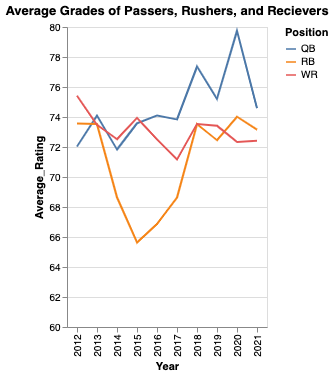

In [375]:
chart2 = alt.Chart(df).mark_line().encode(
    x="Year:N",
    y=alt.Y("Average_Rating:Q", scale=alt.Scale(domain=[60,80])),
    color="Position:N",
).transform_filter(
    (datum.Position == "WR") | (datum.Position == "QB") | (datum.Position == "RB")
).properties(
    title={
        "text": "Average Grades of Passers, Rushers, and Recievers"
    }
)

chart2